PUI2016 Extra Credit Assignment 

Uber’s impact on New York City’s traffic (in Midtown Manhattan)
Nonie Mathur, nm2565, nm2565

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os


%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/nm2565/PUI2016'

**Research question:
Does Uber have an impact on the traffic patterns in New York City?**

**H0** = The average number of Uber trips in a day on the streets in Midtown Manhattan is more than the average number of ‘For Hire Vehicles’ and taxi trips in a day on the streets in Midtown Manhattan at a significance level of 0.05.


**Ha** = The average number of Uber trips in a day on the streets in Midtown Manhattan is less than or equal to the average number of ‘For Hire Vehicles’ and taxi trips in a day on the streets in Midtown Manhattan at a significance level of 0.05.

In [3]:
fhv = pd.read_csv ('Aggregate FHV Data.csv', thousands = ',')
#reading the csv file. Note here that the values here were written with ',' which made them 'text'. 

In [4]:
fhv.head(150)

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,...,Average trips per hour and day of week (other 8 base),Average trips per hour and day of week (Uber),Average trips per hour and day of week (Lyft),Location,Uber and Lyft Trips Per Day 2014,Yellow Taxi Trips Per Day 2014,Yellow Taxi Trips Per Day 2013,Hour,Uber and Lyft Trips in MN Core (Sep 2014),Change in Daily Yellow Trips in MN Core (Sep 2014 compared with Sep 2013)
0,1-Jul-14,921.0,2871.0,2233.0,1046.0,1744.0,1368.0,3345.0,1668.0,0.0,...,769.0,1458.0,323.0,MN Core,26787.0,389416.0,409361.0,0.0,739.0,-1460.0
1,2-Jul-14,1028.0,2965.0,2409.0,1275.0,2228.0,1661.0,3533.0,1691.0,0.0,...,645.0,1078.0,344.0,JFK,831.0,8521.0,8348.0,1.0,556.0,-1135.0
2,3-Jul-14,1068.0,3361.0,2520.0,1200.0,2121.0,1599.0,3649.0,1157.0,0.0,...,497.0,757.0,362.0,LGA,736.0,9964.0,10280.0,2.0,429.0,-930.0
3,4-Jul-14,1008.0,2174.0,1955.0,1171.0,1459.0,1622.0,3401.0,337.0,0.0,...,385.0,513.0,362.0,Outside MN Core*,9047.0,24862.0,32065.0,3.0,395.0,-782.0
4,5-Jul-14,1214.0,1846.0,1371.0,1371.0,1703.0,1898.0,4081.0,276.0,0.0,...,435.0,308.0,333.0,NaN,NaN,NaN,NaN,4.0,373.0,-561.0
5,6-Jul-14,1048.0,2480.0,1872.0,1251.0,1501.0,1738.0,3545.0,401.0,0.0,...,438.0,308.0,297.0,NaN,NaN,NaN,NaN,5.0,497.0,-140.0
6,7-Jul-14,893.0,3028.0,2213.0,1009.0,1768.0,1457.0,3284.0,1330.0,0.0,...,450.0,322.0,246.0,NaN,NaN,NaN,NaN,6.0,818.0,130.0
7,8-Jul-14,916.0,2706.0,2073.0,1065.0,1815.0,1387.0,3171.0,1634.0,0.0,...,460.0,434.0,176.0,NaN,NaN,NaN,NaN,7.0,1107.0,-63.0
8,9-Jul-14,841.0,2883.0,2209.0,987.0,1827.0,1342.0,3176.0,1897.0,0.0,...,451.0,596.0,96.0,NaN,NaN,NaN,NaN,8.0,1119.0,-449.0
9,10-Jul-14,823.0,3222.0,2425.0,904.0,1746.0,1367.0,3081.0,2047.0,0.0,...,552.0,786.0,43.0,NaN,NaN,NaN,NaN,9.0,914.0,-666.0


**Data Wrangling**

In [5]:
fhv.columns

Index([u'Date', u'American', u'Carmel', u'Dial 7', u'Diplo', u'Firstclass',
       u'Highclass', u'Prestige', u'Skyline', u'Lyft', u'Uber',
       u'Yellow Taxis', u'Green Taxis', u'Time (weekday)', u'Time(Hour)',
       u'Average trips per hour and day of week (other 8 base)',
       u'Average trips per hour and day of week (Uber)',
       u'Average trips per hour and day of week (Lyft)', u'Location',
       u'Uber and Lyft Trips Per Day 2014', u'Yellow Taxi Trips Per Day 2014',
       u'Yellow Taxi Trips Per Day 2013', u'Hour',
       u'Uber and Lyft Trips in MN Core (Sep 2014)',
       u'Change in Daily Yellow Trips in MN Core (Sep 2014 compared with Sep 2013)'],
      dtype='object')

In [6]:
#dropping the columns which were not required for the analysis
fhv.drop(['Time (weekday)', 'Time(Hour)', 'Average trips per hour and day of week (other 8 base)', 'Average trips per hour and day of week (Uber)', 'Average trips per hour and day of week (Lyft)',
       'Location', 'Uber and Lyft Trips Per Day 2014', 'Yellow Taxi Trips Per Day 2014', 'Yellow Taxi Trips Per Day 2013', 'Hour',
       'Uber and Lyft Trips in MN Core (Sep 2014)', 'Change in Daily Yellow Trips in MN Core (Sep 2014 compared with Sep 2013)'], axis = 1, inplace = True)
fhv.head()

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
0,1-Jul-14,921.0,2871.0,2233.0,1046.0,1744.0,1368.0,3345.0,1668.0,0.0,21228.0,440655.0,38167.0
1,2-Jul-14,1028.0,2965.0,2409.0,1275.0,2228.0,1661.0,3533.0,1691.0,0.0,26480.0,434416.0,42472.0
2,3-Jul-14,1068.0,3361.0,2520.0,1200.0,2121.0,1599.0,3649.0,1157.0,0.0,21597.0,412980.0,46046.0
3,4-Jul-14,1008.0,2174.0,1955.0,1171.0,1459.0,1622.0,3401.0,337.0,0.0,14148.0,306773.0,41535.0
4,5-Jul-14,1214.0,1846.0,1371.0,1371.0,1703.0,1898.0,4081.0,276.0,0.0,10890.0,305653.0,46873.0


In [7]:
#Checking the type of data
type (fhv['American'])

pandas.core.series.Series

In [8]:
fhv.fillna(value=0, method=None, axis=None, inplace=False)
#replacing all the NaN values with 0

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis
0,1-Jul-14,921.0,2871.0,2233.0,1046.0,1744.0,1368.0,3345.0,1668.0,0.0,21228.0,440655.0,38167.0
1,2-Jul-14,1028.0,2965.0,2409.0,1275.0,2228.0,1661.0,3533.0,1691.0,0.0,26480.0,434416.0,42472.0
2,3-Jul-14,1068.0,3361.0,2520.0,1200.0,2121.0,1599.0,3649.0,1157.0,0.0,21597.0,412980.0,46046.0
3,4-Jul-14,1008.0,2174.0,1955.0,1171.0,1459.0,1622.0,3401.0,337.0,0.0,14148.0,306773.0,41535.0
4,5-Jul-14,1214.0,1846.0,1371.0,1371.0,1703.0,1898.0,4081.0,276.0,0.0,10890.0,305653.0,46873.0
5,6-Jul-14,1048.0,2480.0,1872.0,1251.0,1501.0,1738.0,3545.0,401.0,0.0,11443.0,310376.0,40354.0
6,7-Jul-14,893.0,3028.0,2213.0,1009.0,1768.0,1457.0,3284.0,1330.0,0.0,18280.0,374578.0,34130.0
7,8-Jul-14,916.0,2706.0,2073.0,1065.0,1815.0,1387.0,3171.0,1634.0,0.0,25763.0,430482.0,35756.0
8,9-Jul-14,841.0,2883.0,2209.0,987.0,1827.0,1342.0,3176.0,1897.0,0.0,27817.0,443822.0,36503.0
9,10-Jul-14,823.0,3222.0,2425.0,904.0,1746.0,1367.0,3081.0,2047.0,0.0,30541.0,451208.0,39051.0


In [9]:
fhv['Other_FHV'] = fhv['American'] + fhv['Carmel'] + fhv['Dial 7'] + fhv['Diplo'] + fhv['Firstclass'] + fhv['Highclass'] + fhv['Prestige'] + fhv['Skyline'] + fhv['Lyft']
fhv.head()
#Making a new column with the total number of FHV vehicles in Midtown Manhattan. 

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis,Other_FHV
0,1-Jul-14,921.0,2871.0,2233.0,1046.0,1744.0,1368.0,3345.0,1668.0,0.0,21228.0,440655.0,38167.0,15196.0
1,2-Jul-14,1028.0,2965.0,2409.0,1275.0,2228.0,1661.0,3533.0,1691.0,0.0,26480.0,434416.0,42472.0,16790.0
2,3-Jul-14,1068.0,3361.0,2520.0,1200.0,2121.0,1599.0,3649.0,1157.0,0.0,21597.0,412980.0,46046.0,16675.0
3,4-Jul-14,1008.0,2174.0,1955.0,1171.0,1459.0,1622.0,3401.0,337.0,0.0,14148.0,306773.0,41535.0,13127.0
4,5-Jul-14,1214.0,1846.0,1371.0,1371.0,1703.0,1898.0,4081.0,276.0,0.0,10890.0,305653.0,46873.0,13760.0


In [31]:
fhv['Total_Taxis'] = fhv['Yellow Taxis'] + fhv['Green Taxis']
fhv.head()
#Adding the total number of taxis (yellow and green)

,Date,American,Carmel,Dial 7,Diplo,Firstclass,Highclass,Prestige,Skyline,Lyft,Uber,Yellow Taxis,Green Taxis,Other_FHV,Total_Taxis
0,1-Jul-14,921.0,2871.0,2233.0,1046.0,1744.0,1368.0,3345.0,1668.0,0.0,21228.0,440655.0,38167.0,15196.0,478822.0
1,2-Jul-14,1028.0,2965.0,2409.0,1275.0,2228.0,1661.0,3533.0,1691.0,0.0,26480.0,434416.0,42472.0,16790.0,476888.0
2,3-Jul-14,1068.0,3361.0,2520.0,1200.0,2121.0,1599.0,3649.0,1157.0,0.0,21597.0,412980.0,46046.0,16675.0,459026.0
3,4-Jul-14,1008.0,2174.0,1955.0,1171.0,1459.0,1622.0,3401.0,337.0,0.0,14148.0,306773.0,41535.0,13127.0,348308.0
4,5-Jul-14,1214.0,1846.0,1371.0,1371.0,1703.0,1898.0,4081.0,276.0,0.0,10890.0,305653.0,46873.0,13760.0,352526.0


In [11]:
fhv_final = pd.DataFrame()
fhv_final.head()
#Creating a new dataframe which has the required columns from the dataframe 'fhv'

""


In [13]:
fhv_final = pd.concat([fhv['Uber'], fhv['Other_FHV'], fhv['Total_Taxis'], fhv['Date']], axis=1)
fhv_final.head()
#adding the required from dataframe fhv to the new dataframe fhv_final

,Uber,Other_FHV,Total_Taxis,Date
0,21228.0,15196.0,478822.0,1-Jul-14
1,26480.0,16790.0,476888.0,2-Jul-14
2,21597.0,16675.0,459026.0,3-Jul-14
3,14148.0,13127.0,348308.0,4-Jul-14
4,10890.0,13760.0,352526.0,5-Jul-14


In [32]:
fhv_final.dropna()

,Uber,Other_FHV,Total_Taxis,Date,Month
0,21228.0,15196.0,478822.0,1-Jul-14,7.0
1,26480.0,16790.0,476888.0,2-Jul-14,7.0
2,21597.0,16675.0,459026.0,3-Jul-14,7.0
3,14148.0,13127.0,348308.0,4-Jul-14,7.0
4,10890.0,13760.0,352526.0,5-Jul-14,7.0
5,11443.0,13836.0,350730.0,6-Jul-14,7.0
6,18280.0,14982.0,408708.0,7-Jul-14,7.0
7,25763.0,14767.0,466238.0,8-Jul-14,7.0
8,27817.0,15162.0,480325.0,9-Jul-14,7.0
9,30541.0,15615.0,490259.0,10-Jul-14,7.0


In [15]:
uber_mean = fhv_final['Uber'].mean()
print (uber_mean)

28842.7391304


In [16]:
otherfhv_mean = fhv_final['Other_FHV'].mean()
print (otherfhv_mean)

18222.8804348


In [33]:
taxi_mean = fhv_final['Total_Taxis'].mean()
print (taxi_mean)

464612.673913


In [17]:
uber_sd = fhv_final['Uber'].std()
print (uber_sd)

6353.06601912


In [18]:
taxi_sd = fhv_final['Total_Taxis'].std()
print (taxi_sd)

44054.440479


In [34]:
otherfhv_sd = fhv_final['Other_FHV'].std()
print (otherfhv_sd)

2782.19419236


In [35]:
z_test = ((otherfhv_mean + taxi_mean) - (uber_mean)/((otherfhv_sd + taxi_sd)/sqrt(len(fhv_final))))
z_test

482827.52509228146

In [21]:
fhv_final['Month'] = pd.to_datetime(fhv_final['Date'], format="%d-%b-%y")
fhv_final['Month'] = fhv_final['Month'].dt.month
fhv_final.head()
fhv_final.dropna()

,Uber,Other_FHV,Total_Taxis,Date,Month
0,21228.0,15196.0,478822.0,1-Jul-14,7.0
1,26480.0,16790.0,476888.0,2-Jul-14,7.0
2,21597.0,16675.0,459026.0,3-Jul-14,7.0
3,14148.0,13127.0,348308.0,4-Jul-14,7.0
4,10890.0,13760.0,352526.0,5-Jul-14,7.0
5,11443.0,13836.0,350730.0,6-Jul-14,7.0
6,18280.0,14982.0,408708.0,7-Jul-14,7.0
7,25763.0,14767.0,466238.0,8-Jul-14,7.0
8,27817.0,15162.0,480325.0,9-Jul-14,7.0
9,30541.0,15615.0,490259.0,10-Jul-14,7.0


In [22]:
fhv_month = fhv_final.groupby(fhv_final['Month']).mean()
#grouping the mean of the FHV vehicles, Uber vehicles and Taxis in the 3 different months. 

In [23]:
list(fhv_month)

['Uber', 'Other_FHV', 'Total_Taxis']

In [24]:
fhv_month.head()

,Uber,Other_FHV,Total_Taxis
Month,,,
7.0,25681.322581,15335.612903,459430.354839
8.0,26750.806452,19837.032258,448471.290323
9.0,34271.200000,19538.433333,486647.166667


In [25]:
len(fhv_month)

3

In [26]:
fhv_month.columns

Index([u'Uber', u'Other_FHV', u'Total_Taxis'], dtype='object')

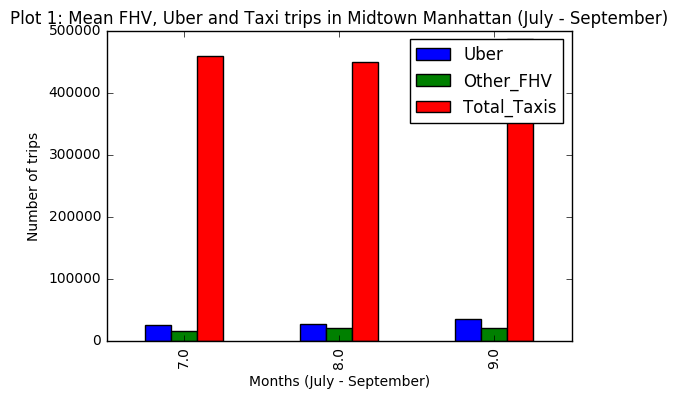

In [27]:
fhv_month.plot.bar()
plt.title('Plot 1: Mean FHV, Uber and Taxi trips in Midtown Manhattan (July - September)')
plt.xlabel('Months (July - September)')
plt.ylabel('Number of trips')

The plot above gives the mean of the number of Ubers, other FHVs and taxis (green and yellow) on the Streets in Midtown Manhattan over the months of July, August and Spetember in the year 2014. This plot clearly shows that the average number of trips made per day by taxis is more than the average number of trips made per day by Uber and the other For Hire Vehicles.

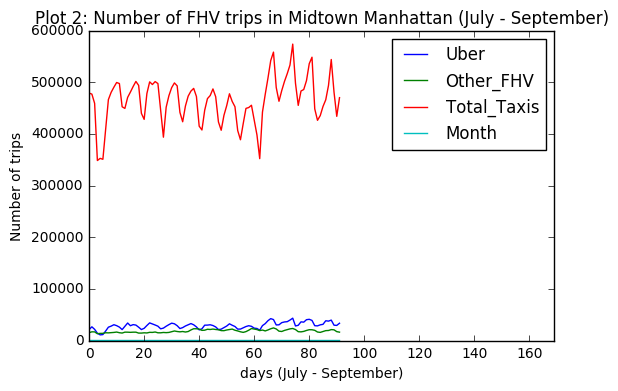

In [30]:
fhv_final.plot.line()
plt.title('Plot 2: Number of FHV trips in Midtown Manhattan (July - September)')
plt.xlabel('days (July - September)')
plt.ylabel('Number of trips')

This plot shows that throughout the months of July, August and September in the year 2014, the number of trips made per day by taxis in Midtown Mnahattan was higher than the number of trips made by Uber and other FHVs. 
This plot also shows that the number of trips made per day by Uber is higher than the number of trips made per day by the other FHVs combined. 